In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Approach 1 - counting Frames in a folder

In [3]:
# clean dataTotalNumberImage data 
dataTotalNumberImage = pd.read_csv('/home/ubuntu/Mask_RCNN/data/outputMetrics/totalNumberImages.txt')
dataTotalNumberImage = dataTotalNumberImage.rename(columns = {'Unnamed: 0': 'Epoch'})
dataTotalNumberImage['Epoch'] = dataTotalNumberImage['Epoch'].str.extract('(\d+)')

# Training 
TrainingMatrix = pd.read_csv('/home/ubuntu/Mask_RCNN/data/outputMetrics/TrainingMatrix.txt')
TrainingMatrix = TrainingMatrix.rename(columns = {'PrePos_TruePos': 'TP', 'PrePos_TrueNeg': 'FP',
                      'PreNeg_TruePos': 'FN', 'PreNeg_TrueNeg': 'TN'})

TrainingMatrix['Accuracy'] = (TrainingMatrix['TP'] + TrainingMatrix['TN'])/(TrainingMatrix['TP'] + 
                                                                            TrainingMatrix['TN']+
                                                                           TrainingMatrix['FP'] + 
                                                                            TrainingMatrix['FN'])

TrainingMatrix['Precision'] = (TrainingMatrix['TP'])/(TrainingMatrix['TP'] + TrainingMatrix['FP'])

TrainingMatrix['Recall'] = (TrainingMatrix['TP'])/(TrainingMatrix['TP'] + TrainingMatrix['FN']) 

TrainingMatrix['F1'] = 2*(TrainingMatrix['Precision']*TrainingMatrix['Recall'])/(
    TrainingMatrix['Precision'] + TrainingMatrix['Recall'])

TrainingMatrix['DataSet'] = 'Training (n=65)'

TrainingMatrix = TrainingMatrix.drop(columns='Unnamed: 0')

# Testing 
TestingMatrix = pd.read_csv('/home/ubuntu/Mask_RCNN/data/outputMetrics/validationMatrix.txt')
TestingMatrix = TestingMatrix.rename(columns = {'PrePos_TruePos': 'TP', 'PrePos_TrueNeg': 'FP',
                      'PreNeg_TruePos': 'FN', 'PreNeg_TrueNeg': 'TN'})

TestingMatrix['Accuracy'] = (TestingMatrix['TP'] + TestingMatrix['TN'])/(TestingMatrix['TP'] + 
                                                                            TestingMatrix['TN']+
                                                                           TestingMatrix['FP'] + 
                                                                            TestingMatrix['FN'])

TestingMatrix['Precision'] = (TestingMatrix['TP'])/(TestingMatrix['TP'] + TestingMatrix['FP'])

TestingMatrix['Recall'] = (TestingMatrix['TP'])/(TestingMatrix['TP'] + TestingMatrix['FN']) 

TestingMatrix['F1'] = 2*(TestingMatrix['Precision']*TestingMatrix['Recall'])/(
    TestingMatrix['Precision'] + TestingMatrix['Recall'])

TestingMatrix['DataSet'] = 'Testing (n=17)'

TestingMatrix = TestingMatrix.drop(columns='Unnamed: 0')
TestingMatrix.sort_values(by=['Epoch'])

#Matrix = pd.concat([TrainingMatrix, TestingMatrix])

Matrix = TestingMatrix

# plotting 

# Epoch vs. Accuracy / F1
sns.set(style = "ticks", font_scale = 1.5, color_codes=True)
sns.set_context("talk")
g= sns.scatterplot(data = Matrix, 
               x="Epoch", y= "Accuracy", edgecolor="0.1", hue = 'DataSet', palette = 'Set2', size = 'Precision')
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Epoch vs. Recall / F1
sns.set(style = "ticks", font_scale = 1.5, color_codes=True)
sns.set_context("talk")
g= sns.scatterplot(data = Matrix, 
               x="Epoch", y= "F1", edgecolor="0.1", hue = 'DataSet', palette = 'Set2', size = 'Recall')
g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Total plot (training)
sns.set(style = "ticks", font_scale = 1.5, color_codes=True)
sns.set_context("talk")

g= sns.scatterplot(data = dataTotalNumberImage, 
               x="Epoch", y= "pred_pos_training", edgecolor="0.1", color= 'red')
g.axhline(50, ls='--', color = 'black')

# Total plot (testing)
sns.set(style = "ticks", font_scale = 1.5, color_codes=True)
sns.set_context("talk")

g= sns.scatterplot(data = dataTotalNumberImage, 
               x="Epoch", y= "pred_pos_validation", edgecolor="0.1", color = 'orange')
g.axhline(232, ls='--', color = 'black')

# ConfusionMatrix, At Epoch50, Training 

TrainingMatrix = TrainingMatrix.sort_values(by=['Epoch'])
TP = TrainingMatrix.iloc[2, 1]
FP = TrainingMatrix.iloc[2, 2]
FN = TrainingMatrix.iloc[2, 3]
TN = TrainingMatrix.iloc[2, 4]
TrainingMatrixConfusion = [[TP, FP], [FN, TN]]

g = sns.heatmap(TrainingMatrixConfusion, annot=True, annot_kws={"size": 16},cmap='coolwarm', 
               xticklabels=['C', 'NC'],
               yticklabels=['C', 'NC'])
plt.xlabel('True')
plt.ylabel('Pred')
plt.suptitle('Training (Epoch = 50)')

# ConfusionMatrix, At Epoch50, Testing 

TestingMatrix = TestingMatrix.sort_values(by=['Epoch'])
TP = TestingMatrix.iloc[2, 1]
FP = TestingMatrix.iloc[2, 2]
FN = TestingMatrix.iloc[2, 3]
TN = TestingMatrix.iloc[2, 4]
TestingMatrixMatrixConfusion = [[TP, FP], [FN, TN]]

g = sns.heatmap(TestingMatrixMatrixConfusion, annot=True, annot_kws={"size": 16},cmap='coolwarm', 
               xticklabels=['C', 'NC'],
               yticklabels=['C', 'NC'], fmt='g')
plt.xlabel('True')
plt.ylabel('Pred')
plt.suptitle('Testing (Epoch = 50)')

# ConfusionMatrix, At Epoch100, Testing 

TestingMatrix = TestingMatrix.sort_values(by=['Epoch'])
TP = TestingMatrix.iloc[4, 1]
FP = TestingMatrix.iloc[4, 2]
FN = TestingMatrix.iloc[4, 3]
TN = TestingMatrix.iloc[4, 4]
TestingMatrixMatrixConfusion = [[TP, FP], [FN, TN]]

g = sns.heatmap(TestingMatrixMatrixConfusion, annot=True, annot_kws={"size": 16},cmap='coolwarm', 
               xticklabels=['C', 'NC'],
               yticklabels=['C', 'NC'], fmt='g')
plt.xlabel('True')
plt.ylabel('Pred')
plt.suptitle('Testing (Epoch = 100)')

# Approach 2 - counting frames w/ w/o objects

In [3]:
trainingTable = pd.read_csv('/home/ubuntu/Mask_RCNN/data/training_forConfusionTablePlot.txt')
TestingTable = pd.read_csv('/home/ubuntu/Mask_RCNN/data/testing_forConfusionTablePlot.txt')

In [12]:
def getConfusionTable(dataFile):
    dataFile['Accuracy'] = (dataFile['PP'] + dataFile['NN'])/(dataFile['PP'] + dataFile['NN']+
                                                                              dataFile['NP'] + 
                                                                               dataFile['PN'])
    
    dataFile['Precision'] = (dataFile['PP'])/(dataFile['PP'] + dataFile['NP'])

    dataFile['Recall'] = (dataFile['PP'])/(dataFile['PP'] + dataFile['PN']) 

    dataFile['F1'] = 2*(dataFile['Precision']*dataFile['Recall'])/(
        dataFile['Precision'] + dataFile['Recall'])
    dataFile = dataFile.drop(columns='Unnamed: 0')
    
    return dataFile 

TrainingConfusionTable = getConfusionTable(trainingTable)
TrainingConfusionTable.to_csv('/home/ubuntu/Mask_RCNN/data/TrainingConfusionTable.txt')

TestingConfusionTable = getConfusionTable(TestingTable)
TestingConfusionTable.to_csv('/home/ubuntu/Mask_RCNN/data/TestingConfusionTable.txt')

<module 'matplotlib.pyplot' from '/home/ubuntu/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

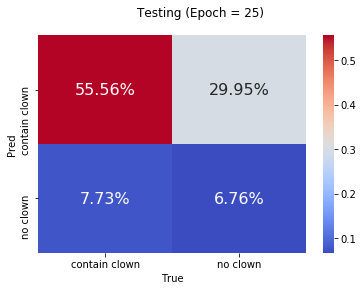

In [31]:
def plotConfusionTable(data):

    TN = data.iloc[2][1]
    TP = data.iloc[2][2]
    FN = data.iloc[2][4]
    FP = data.iloc[2][3]
    ConfusionTable = [[TP, FP], [FN, TN]]

    g = sns.heatmap(ConfusionTable/np.sum(ConfusionTable), annot=True, annot_kws={"size": 16},cmap='coolwarm', 
                   xticklabels=['contain clown', 'no clown'],
                   yticklabels=['contain clown', 'no clown'],
                   fmt='.2%')
    
    plt.xlabel('True')
    plt.ylabel('Pred')
    plt.suptitle('Testing (Epoch = 25)')
    
    return plt
plotConfusionTable(TestingConfusionTable)

# Approach 3 - counting objects

In [36]:
# Only testing data and epoc 25
data = pd.read_csv('/home/ubuntu/Mask_RCNN/data/Testing_truth_pred_objCount.txt')
data = data[data.epoch==25]

In [42]:
# frames with clown
data_with_true_clown = data[data.val_clown!=0]
data_with_true_clown['pred/true'] = data_with_true_clown['#clown']/data_with_true_clown['val_clown']
data_with_true_clown = data_with_true_clown[['pred/true']]
sns.set(style = "ticks", font_scale = 1.5, color_codes=True)
sns.set_context("talk")
g= sns.countplot(data = data_with_true_clown, 
               x="pred/true", palette = 'Set2')
plt.xlabel('Pred/True (number of clown)')
plt.ylabel('Number of frames \n (Frequency)')


#frames without clown
data_without_true_clown = data[data.val_clown==0]
data_without_true_clown = data_without_true_clown[['#clown']]
sns.distplot(data_without_true_clown,bins="doane",kde=False,hist_kws={"align" : "left"})
plt.xlabel('Pred (number of clown)')
plt.ylabel('Number of frames \n (Frequency)')


In [89]:
data = pd.read_csv('/home/ubuntu/Mask_RCNN/data/Testing_truth_pred_objCount.txt')
data = data[data.epoch==25]
data_without_true_clown = data[data.val_clown==0]




Text(0, 0.5, 'Number of pred faces (avg)')

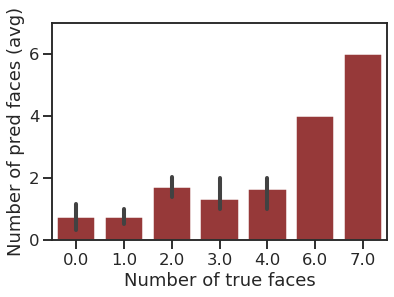

In [109]:
sns.set(style = "ticks", font_scale = 1.5, color_codes=True)
sns.set_context("talk")
sns.barplot(data = data_without_true_clown, x = 'val_nface', y = '#nface', color='brown')
plt.ylim(0, 7)
plt.xlabel('Number of true faces')
plt.ylabel('Number of pred faces (avg)')

Text(0, 0.5, 'Number of pred clown (avg)')

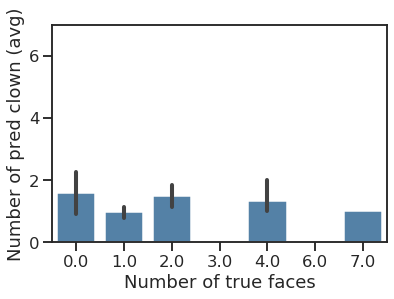

In [110]:
sns.barplot(data = data_without_true_clown, x = 'val_nface', y = '#clown', color='steelblue')
plt.ylim(0, 7)
plt.xlabel('Number of true faces')
plt.ylabel('Number of pred clown (avg)')